## How did each state do on the health inspection in 2017?
Now, we know the overall rating comprises evaluation of different aspects of the nursing homes, such as health inspection, staffing condition and a multi-metric quality measurement. Say we want to know how each state did on the health inspection in 2017.

*Reminder: higher health inspection score reflects more health deficiency.*

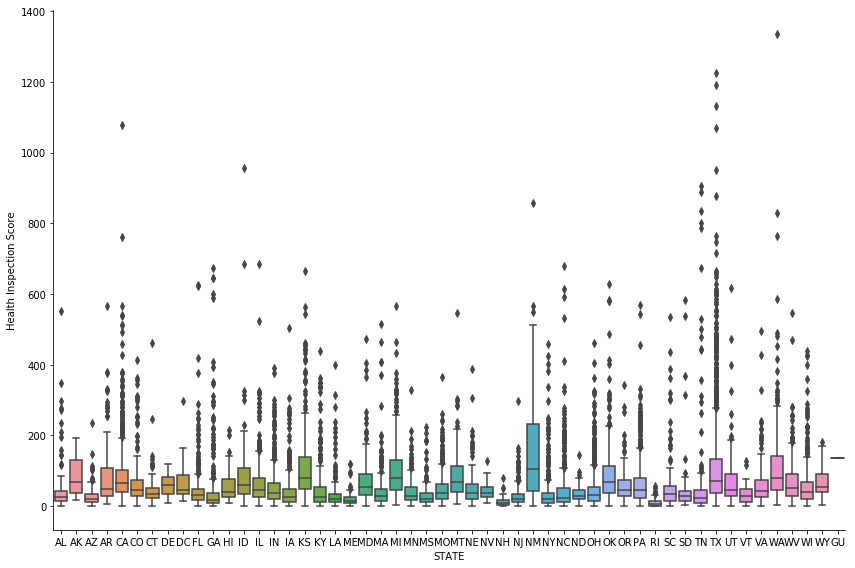

In [7]:
#How did each state do on the health inspection in 2017?
sns.factorplot(kind='box',        # Boxplot
               y='WEIGHTED_ALL_CYCLES_SCORE',       # Y-axis - values for boxplot
               x='STATE',        # X-axis - first factor
               data=df_nona,        # Dataframe 
               size=8,            # Figure size (x100px)      
               aspect=1.5,        # Width = size * aspect 
               legend_out=False)  # Make legend inside the plot
plt.ylabel('Health Inspection Score')
plt.show()

This graph is a bit busy, and contains much information. For now, we are just wondering about the general situation nationwide. If we need to compare several specific states, we can also easily do that with the same method.

Just from a quick look, we can already see that the states which have the highest percentage of 5-star providers, DC and AK, have much less high-score outliers than others.


## Is there a relationship between health inspection scores and overall ratings?
Now I'm really curious. Although we can kind of speculate there is some relationship between health inspection scores and overall ratings, we don't know for sure. We haven't seen it. Seeing is believing, right?

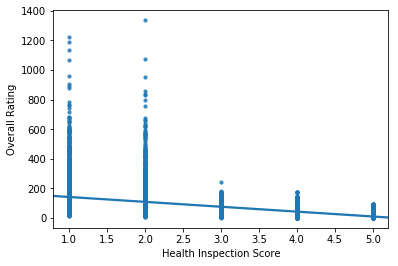

In [8]:
#Is there a relationship between health inspection scores and overall ratings?
sns.regplot(x='OVERALL_RATING', y='WEIGHTED_ALL_CYCLES_SCORE',
            data=df_nona, scatter_kws={'s':10})
plt.xlabel('Health Inspection Score')
plt.ylabel('Overall Rating')
plt.show()

Meh. Somewhat. There seems to be an inverse correlation between the two. But before doing any statistical analysis, we can't say for sure.

## Is there any relationship between health inspection scores and the number of certified beds or residents, or the staffing situation?
Now we are interested to see if the facility and staffing situation in each provider affect its health inspection score. Since CA has the most providers, let's focus on CA for now. We can also do other states or on the national level in the same way.

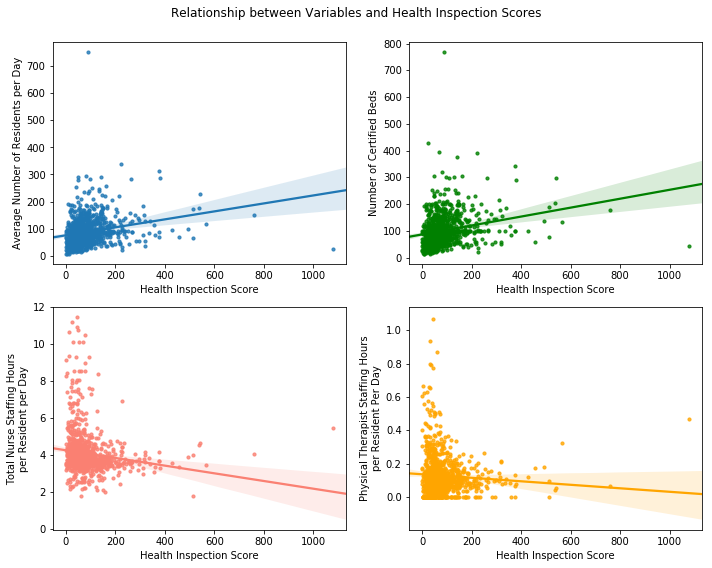

In [9]:
#Let's focus on the data in California.
ca = df_nona[df_nona['STATE'] == 'CA']

#Is there any relationship between health inspection scores and
#the number of certified beds or residents, or the staffing situation?
fig = plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='RESTOT', data=ca, scatter_kws={'s':10})
plt.xlabel('Health Inspection Score')
plt.ylabel('Average Number of Residents per Day')

plt.subplot(2, 2, 2)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='BEDCERT', data=ca,
            scatter_kws={'s':10}, color='g')
plt.xlabel('Health Inspection Score')
plt.ylabel('Number of Certified Beds')

plt.subplot(2, 2, 3)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='TOTHRD', data=ca,
            scatter_kws={'s':10}, color='salmon')
plt.xlabel('Health Inspection Score')
plt.ylabel('Total Nurse Staffing Hours\nper Resident per Day')

plt.subplot(2, 2, 4)
sns.regplot(x='WEIGHTED_ALL_CYCLES_SCORE', y='PTHRD', data=ca,
            scatter_kws={'s':10}, color='orange')
plt.xlabel('Health Inspection Score')
plt.ylabel('Physical Therapist Staffing Hours\nper Resident Per Day')

plt.suptitle('Relationship between Variables and Health Inspection Scores')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()


Interesting. It looks like number of residents and number of beds have a positive correlation with the health inspection score, while the nurse and physical therapist staffing hours negatively correlate with the score.

It is not surprising, as the more residents a nursing home has, the more health deficiency complaints they may have due to insufficient care, thus increasing the health inspection score. And increasing staffing may resolve this situation, and may therefore lower the health inspection score.


## Is there any relationship between overall ratings and the number of certified beds or residents, or the staffing situation?
Now we can do the same for overall ratings, see if these factors affect it.

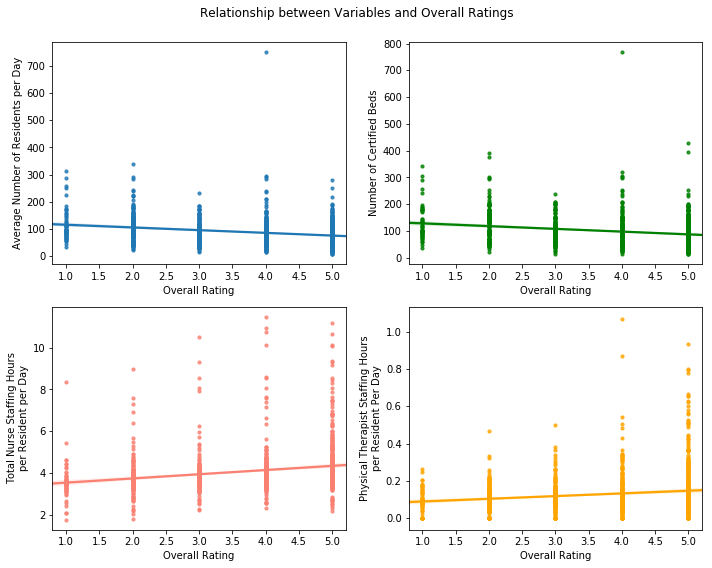

In [10]:
#Is there any relationship between overall ratings and
#the number of certified beds or residents, or the staffing situation?
fig = plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.regplot(x='OVERALL_RATING', y='RESTOT', data=ca, scatter_kws={'s':10})
plt.xlabel('Overall Rating')
plt.ylabel('Average Number of Residents per Day')

plt.subplot(2, 2, 2)
sns.regplot(x='OVERALL_RATING', y='BEDCERT', data=ca,
            scatter_kws={'s':10}, color='g')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Certified Beds')

plt.subplot(2, 2, 3)
sns.regplot(x='OVERALL_RATING', y='TOTHRD', data=ca,
            scatter_kws={'s':10}, color='salmon')
plt.xlabel('Overall Rating')
plt.ylabel('Total Nurse Staffing Hours\nper Resident per Day')

plt.subplot(2, 2, 4)
sns.regplot(x='OVERALL_RATING', y='PTHRD', data=ca,
            scatter_kws={'s':10}, color='orange')
plt.xlabel('Overall Rating')
plt.ylabel('Physical Therapist Staffing Hours\nper Resident Per Day')

plt.suptitle('Relationship between Variables and Overall Ratings')
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

Ha, you can see that the trends seem to have reversed, compared to the last graph of health inspection score.

This makes a lot of sense, because we know from earlier that health inspection score has an inverse relationship with overall rating.

We can delve even more and a lot deeper into the data, but for now, let's stop here. I love data science!